We will use Matrix Factorization via SVD from surprise package for collective filtering.
SVD is model based collective filtering which uses latent features for prediction.
Users and Movies are projected onto the latent space with derived dimensions from the data.

In [ ]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ratings = pd.read_csv("movies-database/ml-25m/ratings.csv")
ratings.describe()
#Downsampling
ratings_small = ratings.sample(100000, random_state=42)

In [3]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.3)

In [11]:
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
rmse_default = accuracy.rmse(predictions)
mae_default = accuracy.mae(predictions)

RMSE: 0.9858
MAE:  0.7633


Hyperparameter Tuning
- n_factors: Factors(default: 100) (high factors -> overfitting)
- n_epochs: epochs
- lr_all: Learning Rate (default:0.005)
- reg_all: regularization term (default:0.02)
- random_state: seed

In [16]:
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 50],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1],
    'random_state': [42]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.969067437475727
{'n_factors': 50, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.1, 'random_state': 42}


In [17]:
best_model = gs.best_estimator['rmse']
best_model.fit(trainset)
predictions_best = best_model.test(testset)
rmse_best = accuracy.rmse(predictions_best)
mae_best = accuracy.mae(predictions_best)

RMSE: 0.9781
MAE:  0.7568


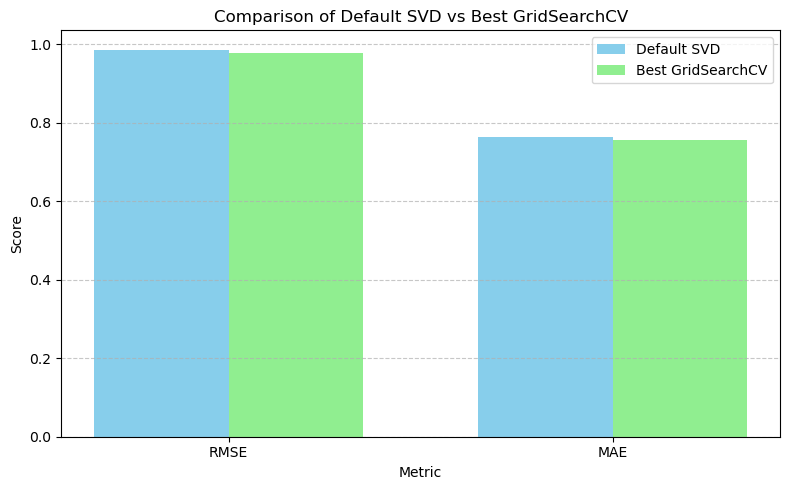

In [18]:
metrics = ['RMSE', 'MAE']
default_scores = [rmse_default, mae_default]
best_scores = [rmse_best, mae_best]

x = range(len(metrics))
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, default_scores, width=bar_width, label='Default SVD', color='skyblue')
plt.bar([p + bar_width for p in x], best_scores, width=bar_width, label='Best GridSearchCV', color='lightgreen')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Default SVD vs Best GridSearchCV')
plt.xticks([p + bar_width/2 for p in x], metrics)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There is some improvement in both the metrics but not by a lot.